# Aufgabe 31

In [11]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [12]:
with h5py.File('smd_deeplearning_gammas_reduced.hdf5', 'r') as f:
    energy = f['energy'][:]
    charges = f['charges'][:]

df = pd.read_hdf('../Aufgabe30/image_parameters_smd_reduced.hdf5')

In [13]:
charges = charges[~np.isnan(charges)]

### a)

In [14]:
df = df[df.corsika_run_header_particle_id == 1]
df = df[df.corsika_event_header_total_energy > 500]
df.corsika_event_header_total_energy = np.log10(df.corsika_event_header_total_energy)

# Feature-Set erstellen

size = np.array(df['size'])
width = np.array(df['width'])
length = np.array(df['length'])
islands = np.array(df['num_islands'])
pixel = np.array(df['num_pixel_in_shower'])
charge_mean = np.array(df['photoncharge_shower_mean'])

# X = np.vstack((size, width, length, islands, pixel)).T
X = np.vstack((size, width, length, islands, pixel, charge_mean)).T
y = np.array(df['corsika_event_header_total_energy'])

# Trainings- und Test-Datensatz erstellen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

Es ist sinnvoll die Energien zu logarithmieren, da diese um mehrere Größenordnungen größer als die Ladungen sind

### b)

In [15]:
forest = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
predict = forest.predict(X_test)

In [21]:
def evaluate_performance(y_true, y_pred):
    delta_y = y_true - y_pred
    mean_delta_y = np.mean(delta_y)
    std_delta_y = np.std(delta_y)
    mean_y_true = np.mean(y_true)
    std_y_true = np.std(y_true)
    
    print('Delta y = {:.3f} +- {:.3f}'.format(mean_delta_y, std_delta_y))
    print('y_true = {:.3f} +- {:.3f}'.format(mean_y_true, std_y_true))
    
    plt.hist(delta_y, bins = 50, range = (mean_delta_y - 3*std_delta_y, mean_delta_y + 3*std_delta_y))
    plt.show()
    plt.clf()
    plt.hexbin(y_pred, y_true, mincnt=1)
    plt.colorbar()
    plt.show()
    plt.clf()
    
    return mean_delta_y, std_delta_y, std_y_true

Delta y = -0.003 +- 0.208
y_true = 3.083 +- 0.329


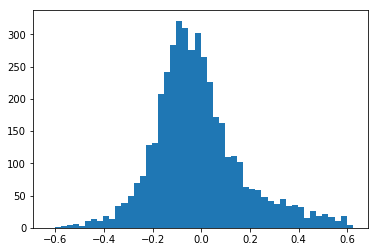

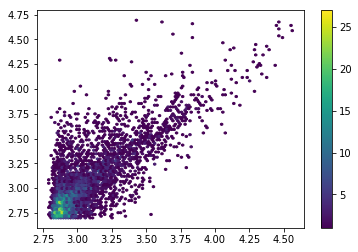

<Figure size 432x288 with 0 Axes>

In [22]:
a,b,c = evaluate_performance(y_test, predict)